In [1]:
from langgraph.graph import StateGraph,END,START
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv


In [6]:
load_dotenv()

False

In [5]:
print(os.getenv("OPENAI_API_KEY"))
print(os.getenv("OPENAI_BASE_URL"))

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
https://openrouter.ai/api/v1


In [9]:
model =  ChatOpenAI(
    model="gpt-4o-mini",   # you can also use e.g. "aAnthropic/claude-3.5-sonnet"
    temperature=0.7
)

In [10]:
class LLMState(TypedDict):
    question:str
    answer:str

In [13]:
def llm_question(state:LLMState) ->LLMState:

    #extreact the question from state
    question=state["question"]

    #define a prompt
    prompt=f'Answer the following question {question}'

    # ask that question to LLM
    result=model.invoke(prompt).content 

    #update state
    state["answer"]=result

    return state

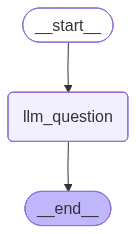

In [16]:
#create a graph

graph = StateGraph(LLMState)

#add nodes

graph.add_node("llm_question",llm_question)


#add edges

graph.add_edge(START,'llm_question')
graph.add_edge("llm_question",END)

#compile
graph.compile()

In [18]:
#compile
workflow=graph.compile()

# execute

inital_state={"question":"How far is moon from the earth?"}

final_state=workflow.invoke(inital_state)

print(final_state["answer"])

The average distance from the Earth to the Moon is about 238,855 miles (384,400 kilometers). This distance can vary slightly due to the Moon's elliptical orbit around the Earth.
